### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import psycopg2.extras
import matplotlib.pyplot as plt

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection

In [3]:
con = PostgresConnection().getConnection()

Successfully connected to the database


In [4]:
# 1. 
# SELECT s.division,s.district, tim.year, tim.month, SUM(t.total_price)
# FROM star_schema.fact_table t 
# JOIN star_schema.store_dim s on s.store_key = t.store_key
# JOIN star_schema.time_dim tim on tim.time_key = t.time_key 
# GROUP BY s.division, s.district, tim.year, tim.month
# ORDER BY tim.year

In [34]:
cur = con.cursor()
select_stmt = "SELECT s.division, s.district, tim.year, tim.month, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"WHERE s.district = 'DHAKA' AND tim.year = '2018'" \
"GROUP BY CUBE(s.division, s.district, tim.year, tim.month) "\
"ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

[('DHAKA', 'DHAKA', None, 10, Decimal('281589.25')),
 ('DHAKA', 'DHAKA', 2018, None, Decimal('3409901.00')),
 ('DHAKA', None, 2018, None, Decimal('3409901.00')),
 ('DHAKA', None, None, None, Decimal('3409901.00')),
 ('DHAKA', None, 2018, 8, Decimal('304524.25')),
 ('DHAKA', None, 2018, 6, Decimal('282974.25')),
 ('DHAKA', None, 2018, 5, Decimal('304098.25')),
 ('DHAKA', None, 2018, 9, Decimal('279054.50')),
 ('DHAKA', None, 2018, 3, Decimal('293338.50')),
 ('DHAKA', None, 2018, 12, Decimal('292039.50')),
 ('DHAKA', None, 2018, 10, Decimal('281589.25')),
 ('DHAKA', None, 2018, 2, Decimal('256501.75')),
 ('DHAKA', None, 2018, 1, Decimal('281827.50')),
 ('DHAKA', None, 2018, 11, Decimal('267188.25')),
 ('DHAKA', None, 2018, 4, Decimal('278681.75')),
 ('DHAKA', None, 2018, 7, Decimal('288083.25')),
 ('DHAKA', None, None, 9, Decimal('279054.50')),
 ('DHAKA', None, None, 10, Decimal('281589.25')),
 ('DHAKA', None, None, 2, Decimal('256501.75')),
 ('DHAKA', None, None, 4, Decimal('278681.75')

In [35]:
df = pd.DataFrame(list(records), columns = ['Division','District','Year', 'Month', 'Sales'])
df

,Division,District,Year,Month,Sales
0,DHAKA,DHAKA,NaN,10.0,281589.25
1,DHAKA,DHAKA,2018.0,NaN,3409901.00
2,DHAKA,None,2018.0,NaN,3409901.00
3,DHAKA,None,NaN,NaN,3409901.00
4,DHAKA,None,2018.0,8.0,304524.25
...,...,...,...,...,...
99,None,DHAKA,NaN,10.0,281589.25
100,None,DHAKA,NaN,3.0,293338.50
101,None,DHAKA,NaN,6.0,282974.25
102,None,DHAKA,NaN,11.0,267188.25


In [36]:
df = df.dropna()
df

,Division,District,Year,Month,Sales
40,DHAKA,DHAKA,2018.0,12.0,292039.50
41,DHAKA,DHAKA,2018.0,3.0,293338.50
42,DHAKA,DHAKA,2018.0,6.0,282974.25
43,DHAKA,DHAKA,2018.0,7.0,288083.25
44,DHAKA,DHAKA,2018.0,8.0,304524.25
45,DHAKA,DHAKA,2018.0,1.0,281827.50
46,DHAKA,DHAKA,2018.0,10.0,281589.25
47,DHAKA,DHAKA,2018.0,5.0,304098.25
48,DHAKA,DHAKA,2018.0,9.0,279054.50
49,DHAKA,DHAKA,2018.0,11.0,267188.25


In [37]:
a = df.Year
b = df. Month
c = df.Sales

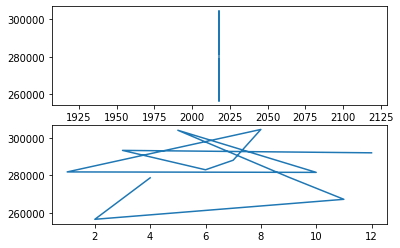

In [38]:
 
# Creating 2 subplots
fig, ax = plt.subplots(2)
 
ax[0].plot(a, c)
ax[1].plot(b, c)

In [177]:
X = df.iloc[:, -3].values
Y = df.iloc[:, 4].values
X

array([2016., 2016., 2016., ..., 2017., 2014., 2015.])

In [178]:
Y

array([Decimal('7745.25'), Decimal('8817.25'), Decimal('13055.00'), ...,
       Decimal('14123.50'), Decimal('14410.75'), Decimal('11046.25')],
      dtype=object)

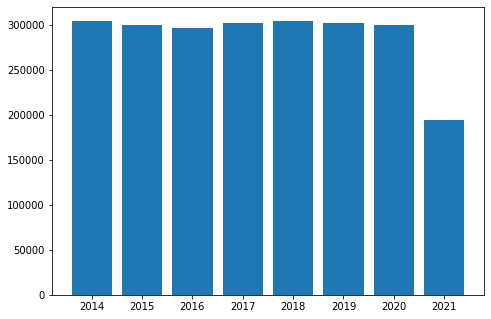

In [179]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y)
plt.show()

In [138]:
X = df1.iloc[:, 3].values
Y = df1.iloc[:, 4].values
X

array([ 5., 11., 10., ...,  4.,  9.,  8.])

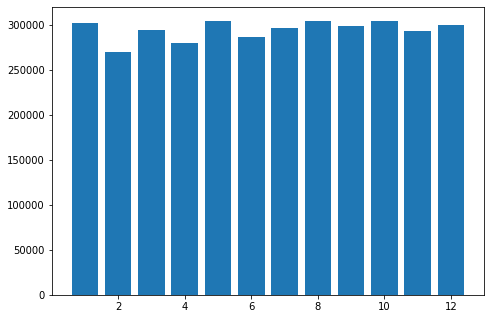

In [139]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y)
plt.show()

In [180]:
df.dtypes

Division     object
District     object
Year        float64
Month       float64
Sales        object
dtype: object

In [181]:
df['Sales'] = df['Sales'].astype('float64')
df.dtypes

C:\Users\Nayan\AppData\Local\Temp\ipykernel_3180\214698349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Sales'].astype('float64')


Division     object
District     object
Year        float64
Month       float64
Sales       float64
dtype: object

In [182]:
x=df.iloc[:, 0].values

In [183]:
x

array(['BARISAL', 'BARISAL', 'BARISAL', ..., 'SYLHET', 'SYLHET', 'SYLHET'],
      dtype=object)

In [184]:
cur = con.cursor()
select_stmt = "SELECT tim.year, COUNT(*) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"GROUP BY CUBE(tim.year) "\
"ORDER BY tim.year "
cur.execute(select_stmt)
records = cur.fetchall()
records

[(2014, 136122),
 (2015, 143447),
 (2016, 141974),
 (2017, 142603),
 (2018, 142984),
 (2019, 141882),
 (2020, 142655),
 (2021, 8333),
 (None, 1000000)]

In [185]:
df = pd.DataFrame(list(records), columns = ['Year', 'Sales'])
df

,Year,Sales
0,2014.0,136122
1,2015.0,143447
2,2016.0,141974
3,2017.0,142603
4,2018.0,142984
5,2019.0,141882
6,2020.0,142655
7,2021.0,8333
8,NaN,1000000


In [186]:
df = df.dropna()
df

,Year,Sales
0,2014.0,136122
1,2015.0,143447
2,2016.0,141974
3,2017.0,142603
4,2018.0,142984
5,2019.0,141882
6,2020.0,142655
7,2021.0,8333


In [212]:
df['Year'] = df['Year'].astype('int64')
df.dtypes

C:\Users\Nayan\AppData\Local\Temp\ipykernel_3180\2547949289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype('int64')


Year     int64
Sales    int64
dtype: object

In [200]:
x = df.Year
y = df.Sales

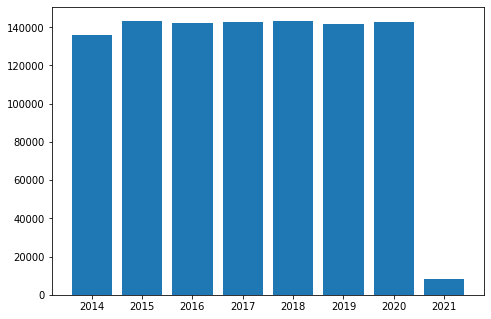

In [201]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()

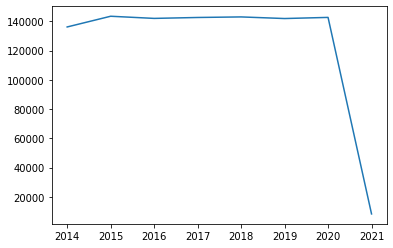

In [259]:

# define data values
x = df.Year
y = df.Sales

plt.plot(x, y) # Plot the chart
plt.show() # display


In [203]:
x = df.Year

Text(0.5, 1.0, 'Sales-Year Pie Chart')

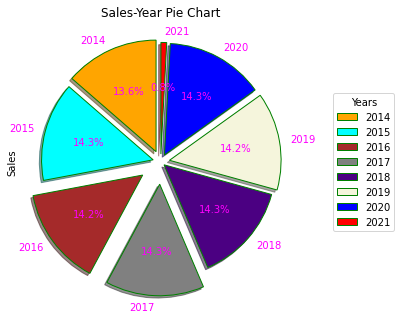

In [257]:
# Creating explode data
explode = (0.1, 0.07, 0.2, 0.2, 0.04, 0.08, 0.07, 0.07)

# Creating color parameters
colors = ( "orange", "cyan", "brown","grey", "indigo", "beige", "blue", "red")

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
ax=df.plot.pie(y='Sales',
                   autopct = lambda pct: func(pct, data),
                   explode = explode,
                   startangle = 90,
                   wedgeprops = wp,
                   labels = x,
                   shadow = True,
                   colors = colors,
                   textprops = dict(color ="magenta"),
                   figsize=(5, 7))
# Adding legend
ax.legend(x,
        title ="Years",
        loc ="center left",
        bbox_to_anchor =(1.1, 0,1,1))

plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Sales-Year Pie Chart")

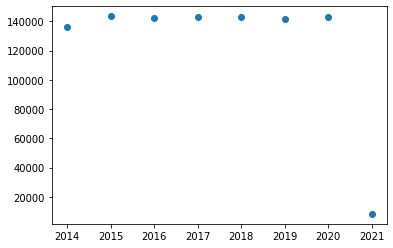

In [25]:
plt.scatter(x, y)

In [26]:
df1.nlargest(3, 'Sales')

,Sales
Year,
2015.0,143447
2018.0,142984
2020.0,142655


### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [20]:
# 2.
# SELECT c.name, tr.bank_name, tr.trans_type, SUM(t.total_price)
# FROM star_schema.fact_table t 
# JOIN star_schema.coustomer_dim c on c.coustomer_key = t.coustomer_key
# JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key 
# WHERE tr.trans_type = 'online' OR tr.trans_type = 'cash' 
# GROUP BY c.name, tr.bank_name, tr.trans_type
# ORDER BY c.name

In [27]:
cur = con.cursor()
select_stmt = "SELECT tm.name, tr.trans_type, tr.bank_name, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.coustomer_dim tm ON tm.coustomer_key = t.coustomer_key " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"WHERE tr.trans_type = 'card' OR tr.trans_type = 'cash'" \
"GROUP BY  tm.name, tr.trans_type, tr.bank_name " \
"ORDER BY tm.name " 
cur.execute(select_stmt)
records = cur.fetchall()
records

[('-', 'card', 'AB Bank Limited', Decimal('329.0')),
 ('-', 'card', 'Bangladesh Commerce Bank Limited', Decimal('514.0')),
 ('-', 'card', 'Bank Asia Limited', Decimal('366.75')),
 ('-', 'card', 'Bengal Commercial Bank Ltd', Decimal('428.0')),
 ('-', 'card', 'Citizens Bank Limited', Decimal('244.0')),
 ('-', 'card', 'City Bank Limited', Decimal('466.0')),
 ('-', 'card', 'Community Bank Bangladesh Limited', Decimal('807.75')),
 ('-', 'card', 'Dhaka Bank Limited', Decimal('985.0')),
 ('-', 'card', 'Dutch-Bangla Bank Limited', Decimal('812.0')),
 ('-', 'card', 'Eastern Bank Limited', Decimal('544.25')),
 ('-', 'card', 'IFIC Bank Limited', Decimal('548.50')),
 ('-', 'card', 'Jamuna Bank Limited', Decimal('94.25')),
 ('-', 'card', 'Meghna Bank Limited', Decimal('1044.50')),
 ('-', 'card', 'Mercantile Bank Limited', Decimal('569.0')),
 ('-', 'card', 'Midland Bank Limited', Decimal('319.0')),
 ('-', 'card', 'Modhumoti Bank Limited', Decimal('246.25')),
 ('-', 'card', 'Mutual Trust Bank Limited

In [28]:
df = pd.DataFrame(list(records), columns = ['Name','TransType','BankName', 'Sales'])
df

,Name,TransType,BankName,Sales
0,-,card,AB Bank Limited,329.0
1,-,card,Bangladesh Commerce Bank Limited,514.0
2,-,card,Bank Asia Limited,366.75
3,-,card,Bengal Commercial Bank Ltd,428.0
4,-,card,Citizens Bank Limited,244.0
...,...,...,...,...
155089,सानिया,card,Standard Bank Limited,368.25
155090,सानिया,card,Trust Bank Limited,254.0
155091,सानिया,card,United Commercial Bank Ltd,231.0
155092,सानिया,card,Uttara Bank Limited,905.0


In [29]:
# df = df.drop(df[df['Name'].isnull() | df['BankName'].isnull()].index)
# df
df = pd.DataFrame(df)
df = df[(df.Name != '-' ) & (df.BankName != 'None')]
df

,Name,TransType,BankName,Sales
35,aafreen fatima,card,AB Bank Limited,307.5
36,aafreen fatima,card,Bangladesh Commerce Bank Limited,507.0
37,aafreen fatima,card,Bank Asia Limited,866.0
38,aafreen fatima,card,Bengal Commercial Bank Ltd,543.75
39,aafreen fatima,card,BRAC Bank Limited,224.0
...,...,...,...,...
155088,सानिया,card,Southeast Bank Limited,140.0
155089,सानिया,card,Standard Bank Limited,368.25
155090,सानिया,card,Trust Bank Limited,254.0
155091,सानिया,card,United Commercial Bank Ltd,231.0


In [30]:
X = df.iloc[:, :-1].values
X

array([['aafreen fatima', 'card', 'AB Bank Limited'],
       ['aafreen fatima', 'card', 'Bangladesh Commerce Bank Limited'],
       ['aafreen fatima', 'card', 'Bank Asia Limited'],
       ...,
       ['सानिया', 'card', 'Trust Bank Limited'],
       ['सानिया', 'card', 'United Commercial Bank Ltd'],
       ['सानिया', 'card', 'Uttara Bank Limited']], dtype=object)

In [31]:
X = pd.DataFrame(list(X), columns = ['Name', 'Type', 'Bank'])
X

,Name,Type,Bank
0,aafreen fatima,card,AB Bank Limited
1,aafreen fatima,card,Bangladesh Commerce Bank Limited
2,aafreen fatima,card,Bank Asia Limited
3,aafreen fatima,card,Bengal Commercial Bank Ltd
4,aafreen fatima,card,BRAC Bank Limited
...,...,...,...
150760,सानिया,card,Southeast Bank Limited
150761,सानिया,card,Standard Bank Limited
150762,सानिया,card,Trust Bank Limited
150763,सानिया,card,United Commercial Bank Ltd


In [32]:
X = pd.DataFrame(X)
X = X[(X.Name != '-' ) & (X.Bank != 'None')]
X

,Name,Type,Bank
0,aafreen fatima,card,AB Bank Limited
1,aafreen fatima,card,Bangladesh Commerce Bank Limited
2,aafreen fatima,card,Bank Asia Limited
3,aafreen fatima,card,Bengal Commercial Bank Ltd
4,aafreen fatima,card,BRAC Bank Limited
...,...,...,...
150760,सानिया,card,Southeast Bank Limited
150761,सानिया,card,Standard Bank Limited
150762,सानिया,card,Trust Bank Limited
150763,सानिया,card,United Commercial Bank Ltd


In [51]:
cur = con.cursor()
select_stmt = "SELECT tim.year, tim.month, it.item_name, it.supplier, tm.name, tr.trans_type, tr.bank_name, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.coustomer_dim tm ON tm.coustomer_key = t.coustomer_key " \
"JOIN star_schema.item_dim it on it.item_key = t.item_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"WHERE it.item_name = 'K Cups Daily Chef Columbian Supremo' " \
"GROUP BY tim.year, tim.month, it.item_name, it.supplier, tm.name, tr.trans_type, tr.bank_name " \
"ORDER BY tm.name " 
cur.execute(select_stmt)
records = cur.fetchall()
records

[(2020,
  4,
  'K Cups Daily Chef Columbian Supremo',
  'Indo Count Industries Ltd',
  '-',
  'mobile',
  'Nagad',
  Decimal('159.0')),
 (2016,
  12,
  'K Cups Daily Chef Columbian Supremo',
  'Indo Count Industries Ltd',
  'aafrin',
  'card',
  'NRB Global Bank Ltd',
  Decimal('265.0')),
 (2017,
  8,
  'K Cups Daily Chef Columbian Supremo',
  'Indo Count Industries Ltd',
  'aafrin',
  'card',
  'Shimanto Bank Ltd',
  Decimal('159.0')),
 (2017,
  3,
  'K Cups Daily Chef Columbian Supremo',
  'Indo Count Industries Ltd',
  'aafrin @ dolly',
  'card',
  'IFIC Bank Limited',
  Decimal('424.0')),
 (2017,
  9,
  'K Cups Daily Chef Columbian Supremo',
  'Indo Count Industries Ltd',
  'aafrin @ dolly',
  'card',
  'IFIC Bank Limited',
  Decimal('106.0')),
 (2016,
  11,
  'K Cups Daily Chef Columbian Supremo',
  'Indo Count Industries Ltd',
  'aakanksha',
  'card',
  'Standard Bank Limited',
  Decimal('106.0')),
 (2018,
  6,
  'K Cups Daily Chef Columbian Supremo',
  'Indo Count Industries Ltd

In [52]:
df = pd.DataFrame(list(records), columns = ['Year', 'Month', 'ItemName','Supplier', 'Name', 'TransType', 'BankName', 'Sales'])
df

,Year,Month,ItemName,Supplier,Name,TransType,BankName,Sales
0,2020,4,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,-,mobile,Nagad,159.0
1,2016,12,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,aafrin,card,NRB Global Bank Ltd,265.0
2,2017,8,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,aafrin,card,Shimanto Bank Ltd,159.0
3,2017,3,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,aafrin @ dolly,card,IFIC Bank Limited,424.0
4,2017,9,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,aafrin @ dolly,card,IFIC Bank Limited,106.0
...,...,...,...,...,...,...,...,...
3874,2015,7,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,zeba,card,Trust Bank Limited,106.0
3875,2015,8,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,zeenat,mobile,Bkash,106.0
3876,2016,8,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,zina kumari,card,Meghna Bank Limited,583.0
3877,2014,4,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,सरोज,card,One Bank Limited,530.0


In [53]:
df = df.dropna()
df

,Year,Month,ItemName,Supplier,Name,TransType,BankName,Sales
0,2020,4,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,-,mobile,Nagad,159.0
1,2016,12,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,aafrin,card,NRB Global Bank Ltd,265.0
2,2017,8,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,aafrin,card,Shimanto Bank Ltd,159.0
3,2017,3,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,aafrin @ dolly,card,IFIC Bank Limited,424.0
4,2017,9,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,aafrin @ dolly,card,IFIC Bank Limited,106.0
...,...,...,...,...,...,...,...,...
3874,2015,7,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,zeba,card,Trust Bank Limited,106.0
3875,2015,8,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,zeenat,mobile,Bkash,106.0
3876,2016,8,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,zina kumari,card,Meghna Bank Limited,583.0
3877,2014,4,K Cups Daily Chef Columbian Supremo,Indo Count Industries Ltd,सरोज,card,One Bank Limited,530.0


In [59]:
Y = df.iloc[:, :1].values
X = df.iloc[:, 7].values
Y

array([[2020],
       [2016],
       [2017],
       ...,
       [2016],
       [2014],
       [2021]], dtype=int64)

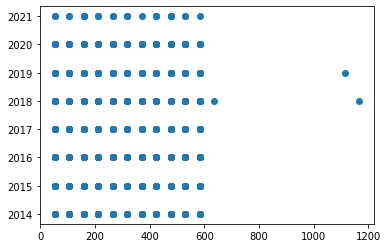

In [60]:
plt.scatter(X, Y)

In [50]:
df = pd.DataFrame(df)
df = df[(df.ItemName == 'K Cups Daily Chef Columbian Supremo') ]
df

,Year,Month,ItemName,Supplier,Name,TransType,BankName,Sales


In [90]:
cur = con.cursor()
select_stmt = "SELECT it.supplier, tim.month, SUM(t.quantity), SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.coustomer_dim tm ON tm.coustomer_key = t.coustomer_key " \
"JOIN star_schema.item_dim it on it.item_key = t.item_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"GROUP BY  it.supplier, tim.month" 
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BIGSO AB', 1, Decimal('51868'), Decimal('1037045.25')),
 ('BIGSO AB', 2, Decimal('45751'), Decimal('911498.25')),
 ('BIGSO AB', 3, Decimal('50875'), Decimal('1010250.75')),
 ('BIGSO AB', 4, Decimal('47358'), Decimal('931442.50')),
 ('BIGSO AB', 5, Decimal('50245'), Decimal('997215.75')),
 ('BIGSO AB', 6, Decimal('47605'), Decimal('947651.25')),
 ('BIGSO AB', 7, Decimal('52022'), Decimal('1023863.50')),
 ('BIGSO AB', 8, Decimal('48988'), Decimal('967515.00')),
 ('BIGSO AB', 9, Decimal('48596'), Decimal('957050.75')),
 ('BIGSO AB', 10, Decimal('50151'), Decimal('998335.00')),
 ('BIGSO AB', 11, Decimal('48815'), Decimal('968903.50')),
 ('BIGSO AB', 12, Decimal('49831'), Decimal('996148.50')),
 ('Bolsius Boxmeer', 1, Decimal('51078'), Decimal('888842.75')),
 ('Bolsius Boxmeer', 2, Decimal('44880'), Decimal('797177.00')),
 ('Bolsius Boxmeer', 3, Decimal('50307'), Decimal('885528.75')),
 ('Bolsius Boxmeer', 4, Decimal('48178'), Decimal('850991.25')),
 ('Bolsius Boxmeer', 5, Decimal('50902

In [91]:
df = pd.DataFrame(list(records), columns = ['Supplier','Month', 'Quantity', 'Sales'])
df

,Supplier,Month,Quantity,Sales
0,BIGSO AB,1,51868,1037045.25
1,BIGSO AB,2,45751,911498.25
2,BIGSO AB,3,50875,1010250.75
3,BIGSO AB,4,47358,931442.50
4,BIGSO AB,5,50245,997215.75
...,...,...,...,...
115,NINGBO SEDUNO IMP & EXP CO.LTD,8,46207,794575.00
116,NINGBO SEDUNO IMP & EXP CO.LTD,9,46292,806636.50
117,NINGBO SEDUNO IMP & EXP CO.LTD,10,46099,788312.00
118,NINGBO SEDUNO IMP & EXP CO.LTD,11,44039,770633.25


In [92]:
x=df.Supplier
y=df.Quantity

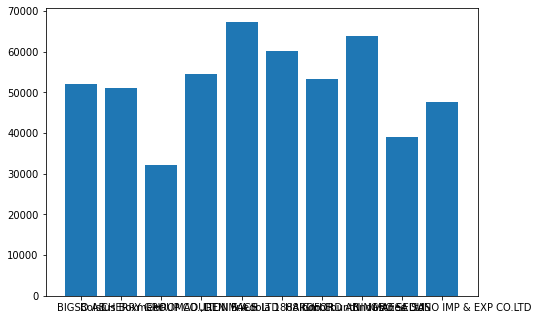

In [93]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()

In [95]:
x=df.Supplier
y=df.Quantity

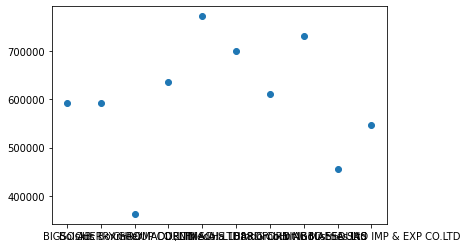

In [89]:
plt.scatter(x,y)

### Q3: Total sales in Barisal

In [ ]:
3.
SELECT  s.division, SUM(t.total_price)
FROM star_schema.fact_table t 
JOIN star_schema.store_dim s on s.store_key = t.store_key
WHERE s.division='BARISAL' 
GROUP BY s.division

### Q4: Total sales in 2015

In [ ]:
4.
SELECT  s.year, SUM(t.total_price)
FROM star_schema.fact_table t 
JOIN star_schema.time_dim s on s.time_key = t.time_key
WHERE s.year=2015 
GROUP BY s.year

### Q5: Total sales of Barisal in 2015

In [ ]:
5. 
SELECT  s.division, tim.year, SUM(t.total_price)
FROM star_schema.fact_table t 
JOIN star_schema.store_dim s on s.store_key = t.store_key
JOIN star_schema.time_dim tim on tim.time_key = t.time_key
WHERE s.division='BARISAL' AND tim.year= 2015 
GROUP BY s.division, tim.year

In [ ]:
6.
